In [22]:
from importlib import reload
import itertools
import os

import pandas as pd
import numpy as np
%matplotlib widget
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

import main

In [71]:
reload(main)

<module 'main' from '/mnt/d/Study/ML/labs/lab1/main.py'>

In [7]:
os.chdir('lab1')

FileNotFoundError: [Errno 2] No such file or directory: 'lab1'

In [81]:
df = pd.read_csv('ex1data1.csv', header=None, names=['population', 'revenue'])
print(df)

    population   revenue
0       6.1101  17.59200
1       5.5277   9.13020
2       8.5186  13.66200
3       7.0032  11.85400
4       5.8598   6.82330
..         ...       ...
92      5.8707   7.20290
93      5.3054   1.98690
94      8.2934   0.14454
95     13.3940   9.05510
96      5.4369   0.61705

[97 rows x 2 columns]


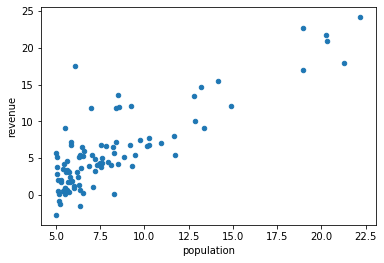

In [82]:
%matplotlib inline
import matplotlib.pyplot as plt

plot = df.plot(x='population', y='revenue', kind='scatter')

In [84]:
theta_0 = pd.Series(0, index=range(len(df.columns)))
x = main.create_design_matrix(df.population)
y = df.revenue

In [89]:
alpha = 0.001
sensitivity = 0.0001

prev_loss = float('inf')
theta = None
count = 0
_progress = []
for current_theta, loss in main.gradient_descent(theta_0, x, y, alpha):
    _progress.append((current_theta[0], current_theta[1], loss))
    count += 1
    delta = prev_loss - loss
    if delta < 0:
        raise ValueError('Loss increases. Decrease the learning rate')
    if delta < sensitivity:
        theta = current_theta
        break
    prev_loss = loss

print(theta)
print('Finished in {} iterations'.format(count))

progress = pd.DataFrame.from_records(_progress, columns=['theta0', 'theta1', 'loss'])
# TODO: measure time, select alpha using subset of data

0   -2.150643
1    1.017716
dtype: float64
Finished in 4568 iterations


In [30]:
hypothesis = lambda xi: theta.dot(pd.DataFrame([1, xi]))
hypothesis_data = pd.DataFrame([
    [df.population.min(), hypothesis(df.population.min())], 
    [df.population.max(), hypothesis(df.population.max())]
], columns=df.columns).astype('float64')
print(hypothesis_data)

   population    revenue
0      5.0269   2.964267
1     22.2030  20.448293


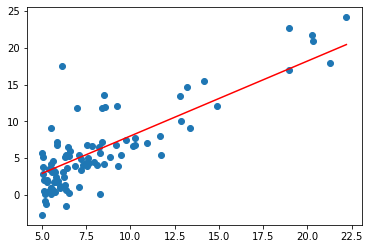

In [31]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(df.population, df.revenue)
plt.plot(hypothesis_data.population, hypothesis_data.revenue, color='red')
plt.show()

In [88]:
%matplotlib widget
import matplotlib.pyplot as plt

def extended_borders(series):
    min = series.min()
    max = series.max()
    width = max - min
    mean = (max + min) / 2
    return (mean - width, mean + width)

theta0_borders = extended_borders(progress.theta0)
theta1_borders = extended_borders(progress.theta1)
grid = np.meshgrid(
    np.linspace(theta0_borders[0], theta0_borders[1], 30),
    np.linspace(theta1_borders[0], theta1_borders[1], 30)
)
Z = np.apply_along_axis(
    main.linear_loss_function, 2, np.dstack(grid), x, y
)

fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')
ax.plot(progress.theta0, progress.theta1, progress.loss, color='red')
ax.plot_wireframe(grid[0], grid[1], Z, color='green')
# TODO: show contour
#ax.contourf(grid[0], grid[1], Z)

plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …